In [37]:
import pandas as pd
import talib as ta
import pynance as pn
import matplotlib.pyplot as plt

## Load and Prepare the Data

In [23]:
# Load the CSV files
aapl_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
goog_data = pd.read_csv('../data/yfinance_data/GOOG_historical_data.csv')
msft_data = pd.read_csv('../data/yfinance_data/MSFT_historical_data.csv')
amzn_data = pd.read_csv('../data/yfinance_data/AMZN_historical_data.csv')
meta_data = pd.read_csv('../data/yfinance_data/META_historical_data.csv')
nvda_data = pd.read_csv('../data/yfinance_data/NVDA_historical_data.csv')
tsla_data = pd.read_csv('../data/yfinance_data/TSLA_historical_data.csv')

In [24]:
print("AAPL Data")
print(aapl_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\nAMZN Data")
print(amzn_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\nMSFT Data")
print(msft_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\META Data")
print(meta_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\nGOOG Data")
print(goog_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\nNVDA Data")
print(nvda_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\TSLA Data")
print(tsla_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

AAPL Data
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600

AMZN Data
         Date      Open      High       Low     Close  Adj Close      Volume
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000

MSFT Data
         Date      Open      High       Low     Cl

## Apply Analysis Indicators with TA-Lib

In [34]:
# Calculate Moving Averages, RSI, and MACD for AAPL
aapl_data['SMA_50'] = ta.SMA(aapl_data['Close'], timeperiod=20)
aapl_data['RSI'] = ta.RSI(aapl_data['Close'], timeperiod=14)
aapl_data['MACD'], aapl_data['MACD_signal'], aapl_data['MACD_hist'] = ta.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Repeat for GOOG and MSFT
goog_data['SMA_50'] = ta.SMA(goog_data['Close'], timeperiod=20)
goog_data['RSI'] = ta.RSI(goog_data['Close'], timeperiod=14)
goog_data['MACD'], goog_data['MACD_signal'], goog_data['MACD_hist'] = ta.MACD(goog_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

msft_data['SMA_50'] = ta.SMA(msft_data['Close'], timeperiod=20)
msft_data['RSI'] = ta.RSI(msft_data['Close'], timeperiod=14)
msft_data['MACD'], msft_data['MACD_signal'], msft_data['MACD_hist'] = ta.MACD(msft_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Display the first few rows with indicators
print("\nAAPL Data with Indicators:")
print(aapl_data.tail())



AAPL Data with Indicators:
             Date        Open        High         Low       Close   Adj Close  \
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

         Volume  Dividends  Stock Splits      SMA_50        RSI      MACD  \
10993  61777600        0.0           0.0  224.228500  48.687742  4.662717   
10994  51391200        0.0           0.0  224.440500  47.386437  3.748082   
10995  41601300        0.0           0.0  224.633500  48.055700  3.026267   
10996  36311800        0.0           0.0  225.014500  48.476184  2.448591   
10997  41643800        0.0           0.0  225.117001  49.359115  2.012764   

       MACD_signal  MA

In [33]:
nan_summary = aapl_data[['SMA_50', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].isna().sum()
print("NaN Values Summary:\n", nan_summary)

NaN Values Summary:
 SMA_50         19
RSI            14
MACD           33
MACD_signal    33
MACD_hist      33
dtype: int64


In [47]:
# Load historical price data for AAPL
aapl_data = pn.data.get('AAPL', start='2023-01-01', end='2024-01-01')
print(aapl_data)

# Calculate financial metrics using PyNance
aapl_data['SMA_50'] = ta.SMA(aapl_data['Close'], timeperiod=20)
aapl_data['RSI'] = ta.RSI(aapl_data['Close'], timeperiod=14)
aapl_data['MACD'], aapl_data['MACD_signal'], aapl_data['MACD_hist'] = ta.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


# Display the calculated metrics
print("\nAAPL Financial Metrics:")
print(aapl_data.tail())


               Open      High      Low   Close     Volume
Date                                                     
2023-12-29  193.900  194.4000  191.725  192.53   42672148
2023-12-28  194.140  194.6600  193.170  193.58   34049898
2023-12-27  192.490  193.5000  191.090  193.15   48087681
2023-12-26  193.610  193.8900  192.830  193.05   28919310
2023-12-22  195.180  195.4100  192.970  193.60   37149570
...             ...       ...      ...     ...        ...
2023-01-09  130.465  133.4100  129.890  130.15   70790813
2023-01-06  126.010  130.2900  124.890  129.62   87754715
2023-01-05  127.130  127.7700  124.760  125.02   80962708
2023-01-04  126.890  128.6557  125.080  126.36   89113633
2023-01-03  130.280  130.9000  124.170  125.07  112117471

[250 rows x 5 columns]

AAPL Financial Metrics:
               Open      High     Low   Close     Volume    SMA_50        RSI  \
Date                                                                            
2023-01-09  130.465  133.4100  129.

 ## Visualize the Data

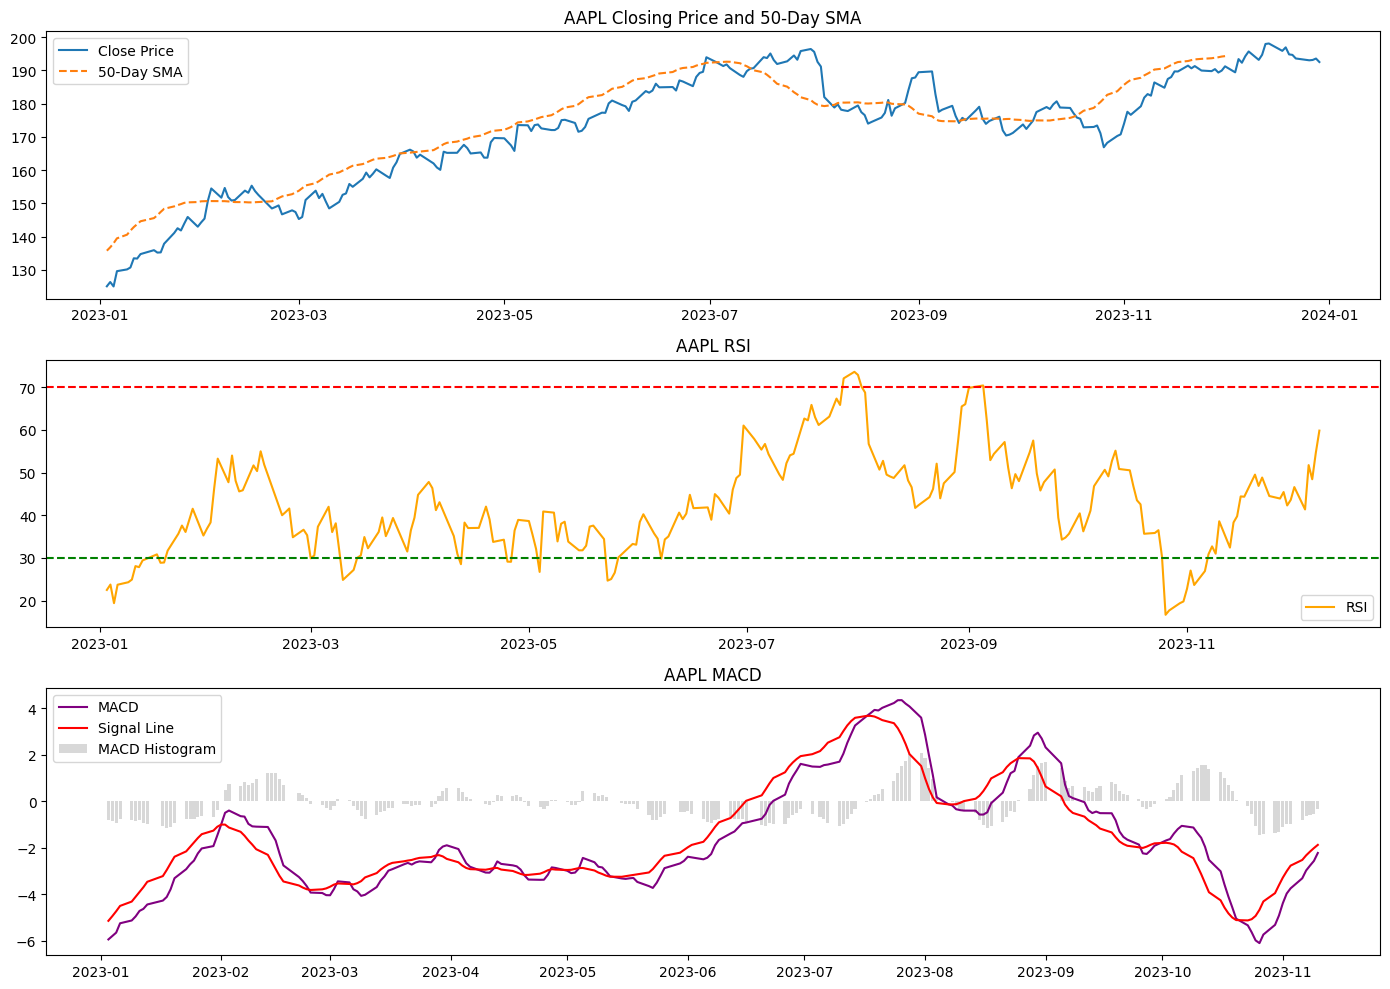

In [52]:
# Plot Moving Average, RSI, and MACD for AAPL
plt.figure(figsize=(14, 10))

# Plot Closing Price and SMA
plt.subplot(3, 1, 1)
plt.plot(aapl_data['Close'], label='Close Price')
plt.plot(aapl_data['SMA_50'], label='50-Day SMA', linestyle='--')
plt.title('AAPL Closing Price and 50-Day SMA')
plt.legend()

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(aapl_data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('AAPL RSI')
plt.legend()

# Plot MACD and Signal Line
plt.subplot(3, 1, 3)
plt.plot(aapl_data['MACD'], label='MACD', color='purple')
plt.plot(aapl_data['MACD_signal'], label='Signal Line', color='red')
plt.bar(aapl_data.index, aapl_data['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.3)
plt.title('AAPL MACD')
plt.legend()

plt.tight_layout()
plt.show()
